In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.colors import ListedColormap

from scipy.interpolate import interp1d
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, train_test_split, StratifiedKFold
from sklearn.manifold import TSNE
from sklearn.metrics import roc_curve, auc

# os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
# import tensorflow as tf
# from tensorflow.keras import layers
# from tensorflow.keras import models
# from tensorflow.keras import losses
# from tensorflow.keras import optimizers
# from tensorflow.keras import callbacks
# from tensorflow.keras import utils
# from tensorflow.keras import backend as K
# import shap

In [ ]:
# import scipy
# import sklearn
# import matplotlib
# print(np.__version__)
# print(pd.__version__)
# print(scipy.__version__)
# print(sklearn.__version__)
# print(shap.__version__)
# print(tf.__version__)
# print(matplotlib.__version__)

In [2]:
f_peaks = './metabolite_data.csv'
df_peaks = pd.read_csv(f_peaks)
peak_list = df_peaks['exp_peak'].values
peak_tols = df_peaks['interval_width_da'].values
peak_names = df_peaks['compound_name'].values
print(peak_names)

['Pyruvate' 'Lactate' 'Malonate' 'Oxaloacetate' 'Fumarate' 'Succinate'
 'Octanoic acid' 'Glutarate' 'Malate' 'alpha-Ketoglutarate' 'Succinate'
 'Decanoic acid' 'Phosphoenolpyruvate' 'cis-Aconitate;Citrate' 'Glucose'
 'Oxalosuccinate' 'Citrate' 'cis-Aconitate' 'Glucose' 'Oxalosuccinate'
 'Tetradecanoic acid' 'Glucose 1-phosphate' 'Glycerate 1,3-biphosphate'
 'Palmitoleic acid' 'Oleic acid' 'Octadecanoic acid'
 'S-Acetyldihydrolipoamide-E' 'Hexadecanoic acid' 'Oleic acid'
 'Octadecanoic acid' 'L-Palmitoylcarnitine']


In [27]:
f_data = './ROI_data_final.csv'
df = pd.read_csv(f_data)
peak_ids = df.columns[4:].values
n_roi = df.shape[0]
n_peaks = len(peak_ids)

In [28]:
sample_ids = df['Sample ID'].values
patient_ids = np.array([int(s.split('.')[1].split('_')[0]) for s in sample_ids], dtype=np.int32)
patient_list, patient_counts = np.unique(patient_ids, return_counts=True)

In [29]:
def norm_array(x):
    return (x-x.min()) / (x.max()-x.min())


def assign_label_benign_tumour(anno):
    anno_l = anno.lower()
    if 'epithelium' in anno_l:
        if 'tumour' in anno_l:
            return 1
        elif 'benign' in anno_l:
            return 0
    else:
        return -1

annotations = df['Annotation'].values
anno_labels = np.array([assign_label_benign_tumour(anno) for anno in annotations], dtype=np.int32)
idx = (anno_labels>=0)
xdata_raw = df[peak_ids][idx].values
xdata = StandardScaler().fit_transform(xdata_raw)
ydata = anno_labels[idx]
pdata = patient_ids[idx]
ids = np.arange(idx.sum())
print(idx.sum(), ydata.sum()/len(ydata), xdata.shape)

969 0.46852425180598556 (969, 31)


In [30]:
z_all = TSNE(init='pca', perplexity=np.sqrt(len(xdata))).fit_transform(xdata)

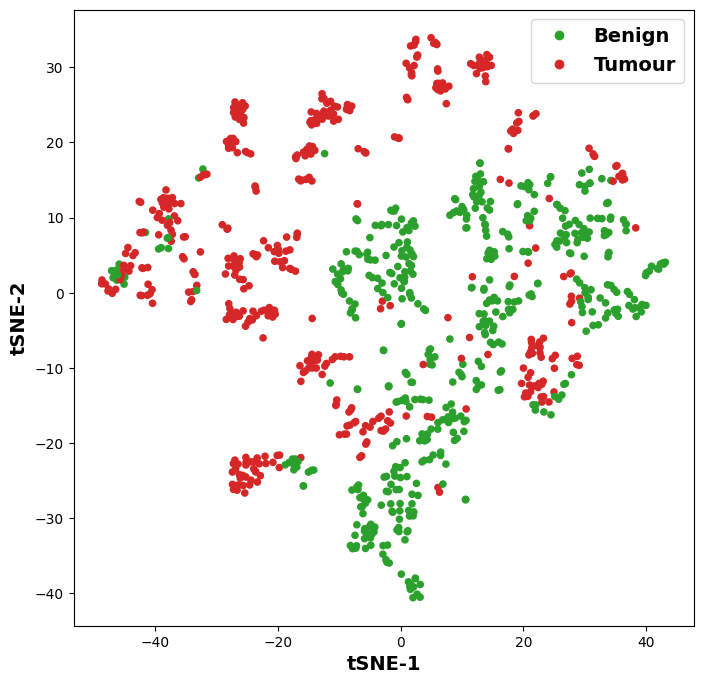

In [31]:
def assign_clabels(annos):
    clabels = []
    for a in annos:
        if 'benign' in a.lower():
            clabels.append(0)
        elif 'tumour' in a.lower():
            clabels.append(1)
        else:
            clabels.append(-1)
    return np.array(clabels, dtype=np.int32)

clabels = ydata

colors = ['tab:green', 'tab:red']
cmap = ListedColormap(colors)
labels = ['Benign', 'Tumour']
handles = [Line2D([], [], marker='o', ls='', color=col, label=lab) for col, lab in zip(colors, labels)]
legend_properties = {'weight':'bold', 'size': 14}

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(z_all[:,0], z_all[:,1], s=20, c=clabels, cmap=cmap)
ax.legend(handles=handles, prop=legend_properties)
ax.set_xlabel('tSNE-1', weight='bold', fontsize=14)
ax.set_ylabel('tSNE-2', weight='bold', fontsize=14)
plt.show()

In [32]:
len(np.unique(patient_ids[idx]))

13

In [33]:
patient_ids

array([ 925,  925,  925,  925,  925,  925,  925,  925,  925,  925,  925,
        925,  925,  925,  925,  925,  925,  925,  925,  925,  925,  925,
       3724, 3724, 3724, 3724, 3724, 3724, 3724, 3724, 3724, 3724, 3724,
       3724, 3724, 3724, 3724, 3724, 3724, 3724, 1383, 1383, 1383, 1383,
       1383, 1383, 1383, 1383, 1383, 1383, 1383, 1383, 1383, 1383, 1383,
       1383, 1383, 1383, 1383, 1383, 1383, 1383, 1383, 1383, 1383, 1383,
       1383, 1383, 1383, 1383, 1383, 1383, 1383, 1383, 1383, 1383, 1383,
       1383, 1383, 1383, 1383, 1383, 1383, 1383, 1383, 1383, 1383, 1383,
       1383, 1383, 1383, 1383, 1383, 1383, 1383, 1383, 1383, 1383, 1383,
       1383, 1383, 1383, 1383, 1383, 1383, 1383, 1383, 1383, 1383, 1383,
       1383, 1383, 3724, 3724, 3724, 3724, 3724, 3724, 3724, 3724, 3724,
       3724, 3724, 3724, 3724, 3724, 3724, 3724, 3724, 3724, 3724, 3724,
       3724, 3724, 3724, 3724, 3724, 3724, 3724, 3724,  925,  925,  925,
        925,  925,  925,  925,  925,  925,  925,  9

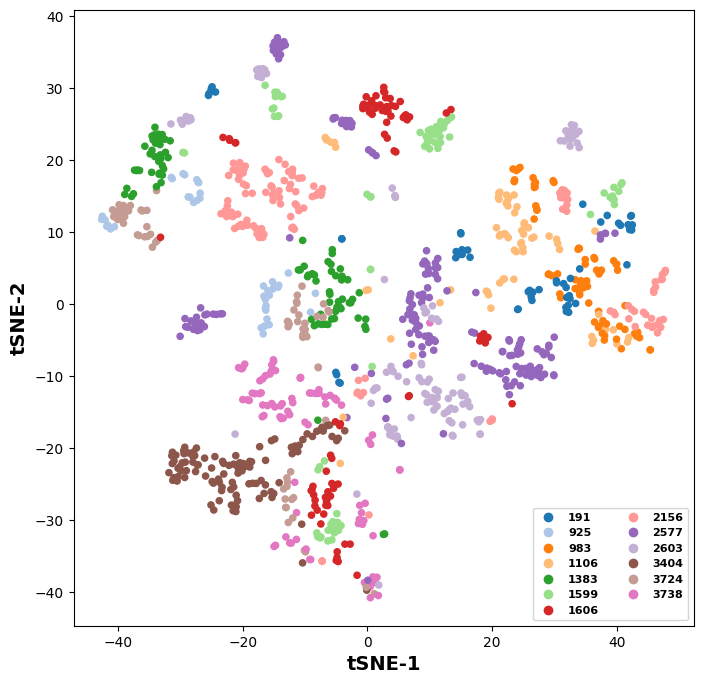

In [25]:
plist = np.unique(patient_ids[idx])
pdict = {p: i for i, p in enumerate(plist)}
clabels = [pdict[p] for p in patient_ids[idx]]

colors = [plt.cm.tab20(n) for n in range(len(patient_list))]
cmap = ListedColormap(colors)
handles = [Line2D([], [], marker='o', ls='', color=col, label=lab) for col, lab in zip(colors, plist)]
legend_properties = {'weight':'bold', 'size': 8}

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(z_all[:,0], z_all[:,1], s=20, c=clabels, cmap=cmap)
ax.legend(handles=handles, prop=legend_properties, ncol=2)
ax.set_xlabel('tSNE-1', weight='bold', fontsize=14)
ax.set_ylabel('tSNE-2', weight='bold', fontsize=14)
plt.show()

In [8]:
def norm_array(x):
    ''' Scale array so all values lie between 0 and 1 '''
    return (x-x.min()) / (x.max() - x.min())


def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall


def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision


def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


def build_classifier(spec_shape, lr=1e-4, num_classes=1):
    inputs = layers.Input(shape=spec_shape)
    x = layers.BatchNormalization()(inputs)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dense(64, activation='relu')(x)
    if num_classes==1:
        outputs = layers.Dense(1, activation='sigmoid')(x)
        model = models.Model(inputs=inputs, outputs=outputs)
        opt = optimizers.Adam(lr=lr)
        model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy', f1_m])
        return model
    else:
        outputs = layers.Dense(num_classes, activation='softmax')(x)
        model = models.Model(inputs=inputs, outputs=outputs)
        opt = optimizers.Adam(lr=lr)
        model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
        return model
    
    
def extract_features(classifier, data):
    extractor = models.Model(classifier.input, classifier.layers[-2].output)
    features = extractor.predict(data)
    return features


def spec_generator(data, labels, s_aug=0.1, batch_size=256):
    ''' Generator for training classifier on MSI data
        Data should be an NxM numpy array of N samples with M features
        Labels should be in the format required by the classifier (e.g. onehot)
        s_aug controls magnitude of data augmentation
            - augmentation consists of adding gaussian random noise to each value
            - magnitude of noise added to feature depends on average value of 
              feature and s_aug '''
    nsamp, samp_shape = data.shape
    i_mean = np.mean(data, axis=0)*s_aug
    while True:
        idx = np.random.choice(nsamp, size=batch_size)
        jitter = np.random.randn(batch_size, samp_shape)*s_aug
        yield data[idx]+jitter, labels[idx]

In [9]:
nfolds = 5
batch_size = 32

kf = KFold(n_splits=nfolds, shuffle=True)
results_dict = {}
results_dict['test_accuracy'] = np.zeros(nfolds)
results_dict['test_f1'] = np.zeros(nfolds)

neg = (ydata==0).sum()
pos = (ydata==1).sum()
total = len(ydata)
weight_for_0 = (1 / neg) * (total / 2.0)
weight_for_1 = (1 / pos) * (total / 2.0)
class_weight = {0: weight_for_0, 1: weight_for_1}

for n, (trainval_index, test_index) in enumerate(kf.split(patient_list)):
    ntrain = int(0.9*len(trainval_index))
    train_index = trainval_index[:ntrain]
    val_index = trainval_index[ntrain:]
    patients_train = patient_list[train_index]
    idx_train = np.isin(pdata, patients_train)
    patients_val = patient_list[val_index]
    idx_val = np.isin(pdata, patients_val)
    patients_test = patient_list[test_index]
    idx_test = np.isin(pdata, patients_test)
    x_train = xdata[idx_train]
    y_train = ydata[idx_train]
    x_val = xdata[idx_val]
    y_val = ydata[idx_val]
    x_test = xdata[idx_test]
    y_test = ydata[idx_test]
    
    spec_shape = x_train.shape[1:]
    classifier = build_classifier(spec_shape, lr=1e-4)
    cbs = [callbacks.EarlyStopping(patience=10, restore_best_weights=True,
                                      min_delta=1e-4, monitor='val_loss')]

    train_generator = spec_generator(x_train, y_train, s_aug=0.2, batch_size=batch_size)
    val_generator = spec_generator(x_val, y_val, s_aug=0, batch_size=batch_size)
    train_steps = len(x_train)//batch_size
    val_steps = len(x_val)//batch_size

    history = classifier.fit(train_generator, validation_data=val_generator, 
                             epochs=100, steps_per_epoch=train_steps,
                             validation_steps=val_steps, callbacks=cbs, verbose=0,
                             class_weight=class_weight)

    test_loss, test_acc, test_f1 = classifier.evaluate(x_test, y_test)
    results_dict['test_accuracy'][n] = test_acc
    results_dict['test_f1'][n] = test_f1
    results_dict['history_fold-%d'%(n+1)] = history.history
    
    features = extract_features(classifier, xdata)
    results_dict['features_fold-%d'%(n+1)] = features
    
    y_pred = classifier.predict(x_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    auc_test = auc(fpr, tpr)
    results_dict['fpr_fold-%d'%(n+1)] = fpr
    results_dict['tpr_fold-%d'%(n+1)] = tpr
    results_dict['auc_fold-%d'%(n+1)] = auc_test
    
    test_summary = shap.kmeans(x_test, 15)
    explainer = shap.KernelExplainer(classifier, test_summary)
    results_dict['shap_vals_fold-%d'%(n+1)] = explainer.shap_values(x_test)[0]
    results_dict['eval_data_fold-%d'%(n+1)] = x_test

    print('')
    
print('Test accuracy: %.2f%%' %(100*np.mean(results_dict['test_accuracy'])))
print('Test F1: %.2f%%' %(100*np.mean(results_dict['test_f1'])))

2023-08-16 15:40:39.610700: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-08-16 15:40:39.611076: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-08-16 15:40:39.611098: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2023-08-16 15:40:39.611142: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (seskscpn222.prim.scp): /proc/driver/nvidia/version does not exist
2023-08-16 15:40:39.611520: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operatio

7/7 [==============================] - 0s 2ms/step - loss: 0.3294 - accuracy: 0.9120 - f1_m: 0.7584


  0%|          | 0/216 [00:00<?, ?it/s]

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight


9/9 [==============================] - 0s 2ms/step - loss: 0.5086 - accuracy: 0.7292 - f1_m: 0.5961


  0%|          | 0/277 [00:00<?, ?it/s]

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight


9/9 [==============================] - 0s 2ms/step - loss: 0.4320 - accuracy: 0.8287 - f1_m: 0.8142


  0%|          | 0/286 [00:00<?, ?it/s]

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight


5/5 [==============================] - 0s 2ms/step - loss: 0.4847 - accuracy: 0.7622 - f1_m: 0.4632


  0%|          | 0/143 [00:00<?, ?it/s]

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight


8/8 [==============================] - 0s 2ms/step - loss: 0.6881 - accuracy: 0.7257 - f1_m: 0.5065


  0%|          | 0/237 [00:00<?, ?it/s]

The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight


Test accuracy: 79.16%
Test F1: 62.77%


The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 


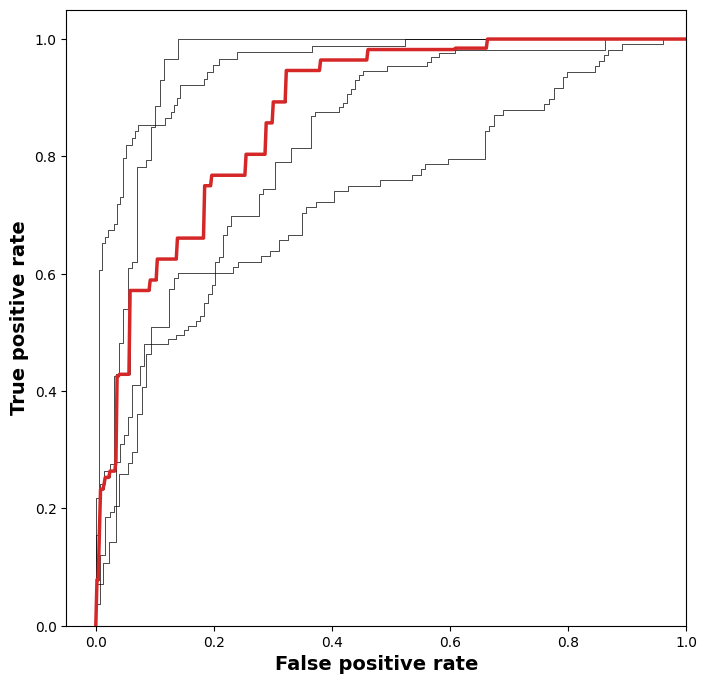

0.8753699730289455
0.867816091954023


In [10]:
xaxis = np.linspace(0, 1, 500)

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
fpr_list, tpr_list = [], []
for n in range(5):
    fpr = results_dict['fpr_fold-%d'%(n+1)]
    tpr = results_dict['tpr_fold-%d'%(n+1)]
    ax.plot(fpr, tpr, color='k', lw=0.5)
    f_tpr = interp1d(fpr, tpr, 0)
    fpr_list.append(xaxis)
    tpr_list.append(f_tpr(xaxis))
fpr_med = np.median(fpr_list, axis=0)
tpr_med = np.median(tpr_list, axis=0)
tpr_med[0] = 0
ax.plot(fpr_med, tpr_med, lw=2.5, color='tab:red')
ax.set_xlim(None, 1)
ax.set_ylim(0, None)
ax.set_xlabel('False positive rate', weight='bold', fontsize=14)
ax.set_ylabel('True positive rate', weight='bold', fontsize=14)
plt.show()

print(auc(fpr_med, tpr_med))
print(np.median([results_dict['auc_fold-%d'%(n+1)] for n in range(5)]))

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
The PCA initialization in TSNE will change to have the standard d

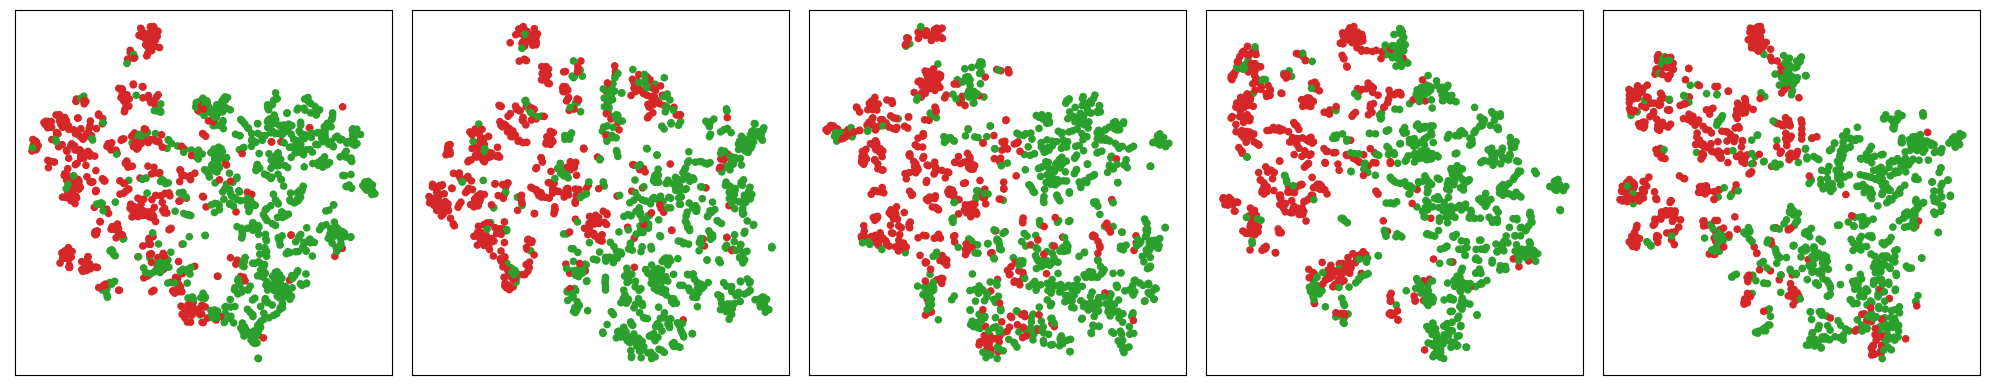

In [11]:
fig, axes = plt.subplots(1, 5, figsize=(20, 4))
for n, ax in enumerate(axes):
    feats = results_dict['features_fold-%d'%(n+1)]
    z_feats = TSNE(init='pca', perplexity=30).fit_transform(feats)
    ax.scatter(z_feats[:,0], z_feats[:,1], s=20, c=clabels, cmap=cmap)
    ax.set_xticks([])
    ax.set_yticks([])
plt.tight_layout()
plt.show()

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.


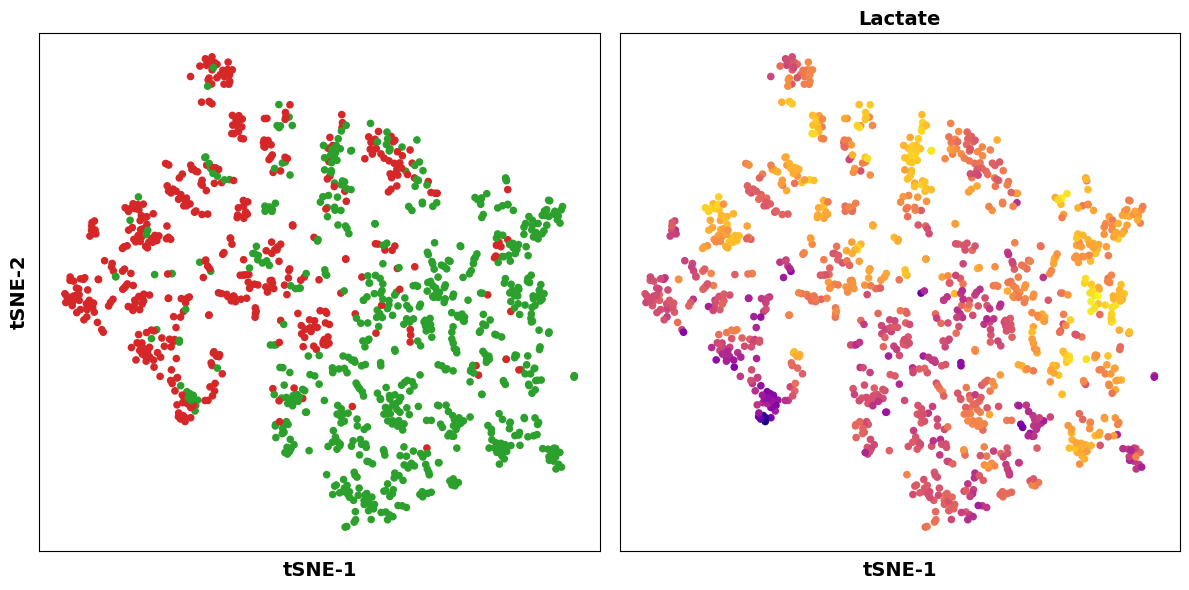

In [12]:
n = 1
feats = results_dict['features_fold-%d'%(n+1)]
z_feats = TSNE(init='pca', perplexity=30).fit_transform(feats)

k = 1

fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)
axes[0].scatter(z_feats[:,0], z_feats[:,1], s=20, c=clabels, cmap=cmap)
axes[1].scatter(z_feats[:,0], z_feats[:,1], s=20, c=xdata[:,k], cmap='plasma')
axes[1].set_title(peak_names[k], weight='bold', fontsize=14)
for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('tSNE-1', weight='bold', fontsize=14)
axes[0].set_ylabel('tSNE-2', weight='bold', fontsize=14)
plt.tight_layout()
plt.show()

In [13]:
shap_scores = np.zeros(xdata.shape)
eval_data = np.zeros(xdata.shape)
n = 0
for i in range(nfolds):
    shaps = results_dict['shap_vals_fold-%d'%(i+1)]
    xtest = results_dict['eval_data_fold-%d'%(i+1)]
    k = len(shaps)
    shap_scores[n:n+k] = shaps
    eval_data[n:n+k] = xtest
    n += k

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


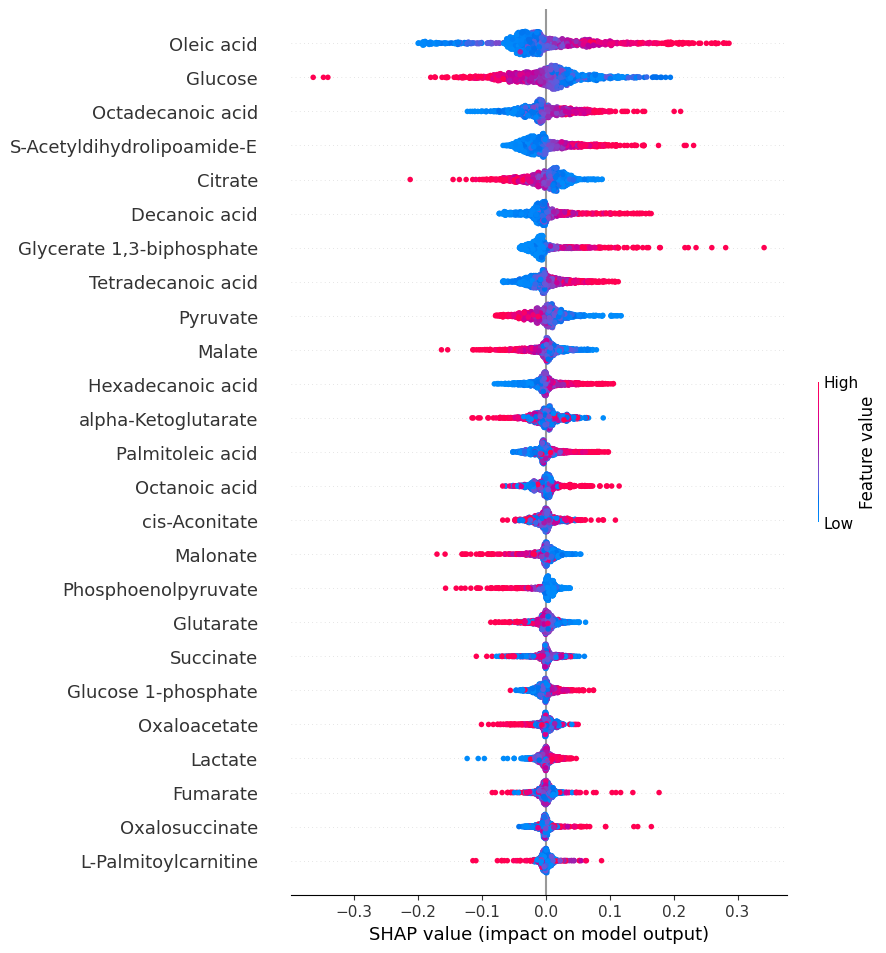

In [14]:
peak_names_short = [pn.split(';')[-1] for pn in peak_names]
peak_names_shap, ui = np.unique(peak_names_short, return_index=True)

shap.summary_plot(shap_scores[:,ui], eval_data[:,ui], feature_names=peak_names_shap, max_display=len(peak_names_shap))

In [18]:
np.save('shap_scores', shap_scores)
np.save('eval_data', eval_data)
np.save('peak_names_shap', peak_names_shap)

In [17]:
for i, peak_name in enumerate(peak_names_shap):
    print(peak_name, np.mean(np.abs(shap_scores[:,ui][:,i])))

Citrate 0.024367215844977023
Decanoic acid 0.022415887585962524
Fumarate 0.008849609578933253
Glucose 0.042061453555217135
Glucose 1-phosphate 0.010959817218000307
Glutarate 0.011407761723652704
Glycerate 1,3-biphosphate 0.021645714862084532
Hexadecanoic acid 0.01700809783077892
L-Palmitoylcarnitine 0.006809839482015003
Lactate 0.00902685157063559
Malate 0.018027372832575682
Malonate 0.012461537081940161
Octadecanoic acid 0.02944272719125485
Octanoic acid 0.012979273092684141
Oleic acid 0.055454630553782025
Oxaloacetate 0.010645414638219167
Oxalosuccinate 0.007782135099655168
Palmitoleic acid 0.015411256908482197
Phosphoenolpyruvate 0.01186520780508647
Pyruvate 0.020485329355108637
S-Acetyldihydrolipoamide-E 0.028298486348247737
Succinate 0.011066455323510029
Tetradecanoic acid 0.02158354237108833
alpha-Ketoglutarate 0.01603470349137854
cis-Aconitate 0.0129341957710246
